In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("air_quality.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3316 non-null   int64  
 1   country        3316 non-null   object 
 2   state          3316 non-null   object 
 3   city           3316 non-null   object 
 4   station        3316 non-null   object 
 5   station_code   3316 non-null   object 
 6   last_update    3316 non-null   object 
 7   latitude       3316 non-null   float64
 8   longitude      3316 non-null   float64
 9   pollutant_id   3316 non-null   object 
 10  pollutant_min  3316 non-null   int64  
 11  pollutant_max  3316 non-null   int64  
 12  pollutant_avg  3316 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 336.9+ KB


In [4]:
data.head(3)

,id,country,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,0,India,Andhra_Pradesh,A0ntapur,Gulzarpet,APPCB,26-12-2023 22:00,14.675886,77.593027,SO2,0,0,0
1,1,India,Andhra_Pradesh,Chittoor,Gangineni Cheruvu,APPCB,26-12-2023 22:00,13.204880,79.097889,SO2,7,32,12
2,2,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,NH3,2,5,3


In [5]:
numerical_data = data.select_dtypes(include=np.number)
categorical_data = data.select_dtypes(exclude=np.number)

In [6]:
numerical_data = numerical_data.drop(["id"], axis=1)
numerical_data

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
0,14.675886,77.593027,0,0,0
1,13.204880,79.097889,7,32,12
2,13.670000,79.350000,2,5,3
3,13.670000,79.350000,40,64,47
4,13.670000,79.350000,9,50,34
...,...,...,...,...,...
3311,22.499290,88.369170,80,202,125
3312,22.511060,88.351420,2,21,8
3313,22.511060,88.351420,7,63,23
3314,22.511060,88.351420,3,90,45


In [7]:
categorical_data = categorical_data.drop(["country", "last_update"], axis=1)
categorical_data

,state,city,station,station_code,pollutant_id
0,Andhra_Pradesh,A0ntapur,Gulzarpet,APPCB,SO2
1,Andhra_Pradesh,Chittoor,Gangineni Cheruvu,APPCB,SO2
2,Andhra_Pradesh,Tirupati,Tirumala,APPCB,NH3
3,Andhra_Pradesh,Tirupati,Tirumala,APPCB,CO
4,Andhra_Pradesh,Tirupati,Tirumala,APPCB,OZONE
...,...,...,...,...,...
3311,West_Bengal,Kolkata,Jadavpur,WBPCB,PM10
3312,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,NH3
3313,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,SO2
3314,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,OZONE


In [8]:
data.describe()

,id,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,1657.500000,22.769742,78.545983,38.061218,110.646261,69.669481
std,957.391073,5.407461,4.882075,55.475655,126.634146,85.316767
min,0.000000,8.514909,70.909168,0.000000,0.000000,0.000000
25%,828.750000,19.065931,75.389600,4.000000,16.000000,10.000000
50%,1657.500000,23.264759,77.300590,16.000000,62.000000,36.000000
75%,2486.250000,27.194120,80.327067,47.000000,148.000000,90.000000
max,3315.000000,34.066206,94.636574,371.000000,500.000000,439.000000


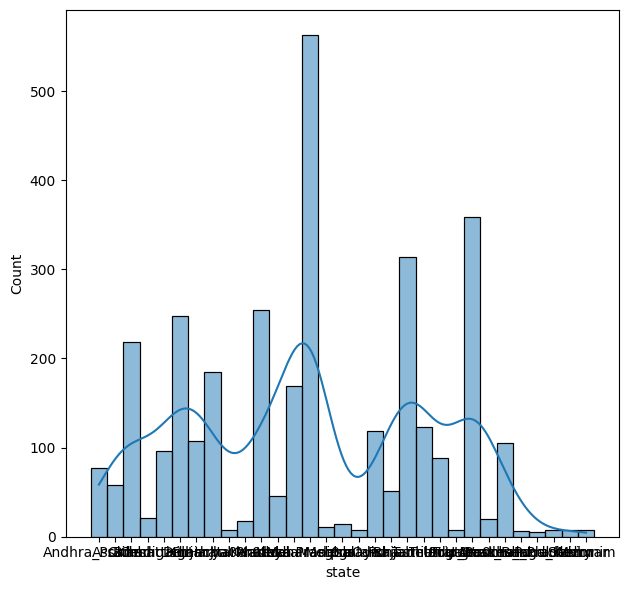

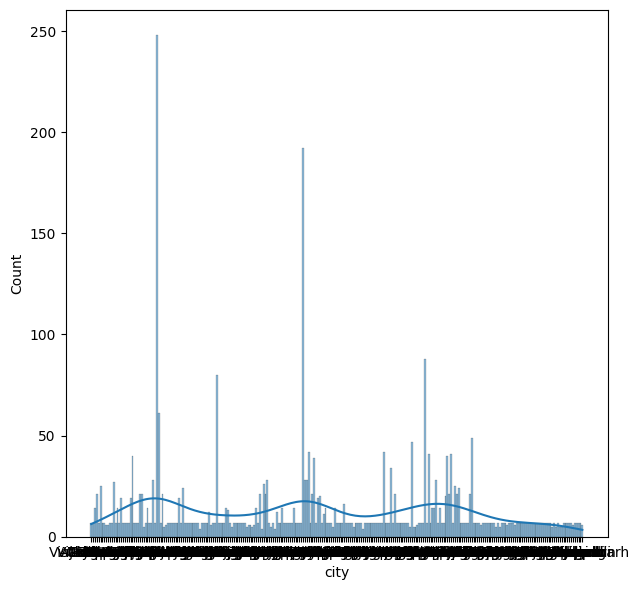

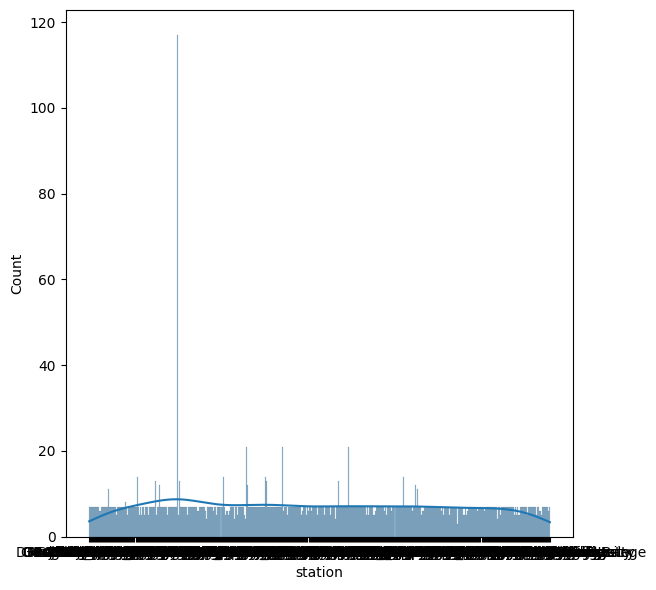

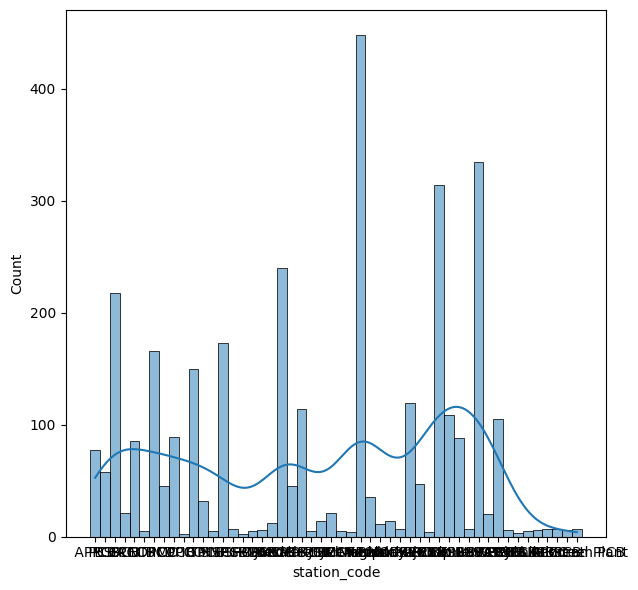

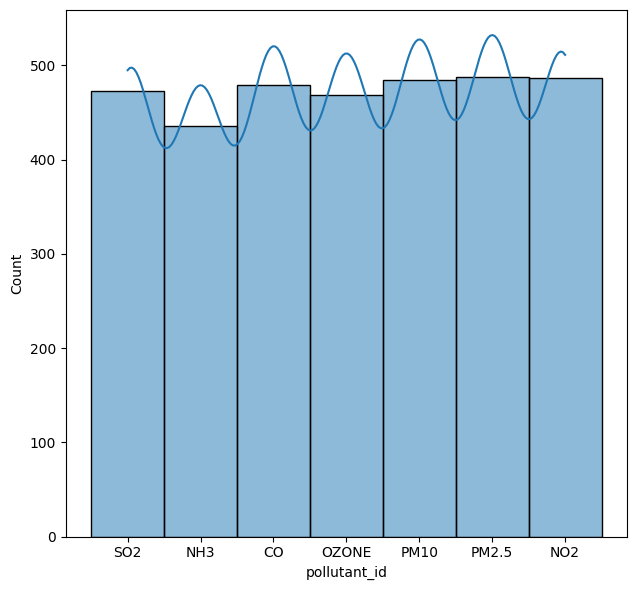

In [10]:
for k in categorical_data:
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)

    sns.histplot(categorical_data[k],kde=True)        
    plt.tight_layout()
    plt.show()

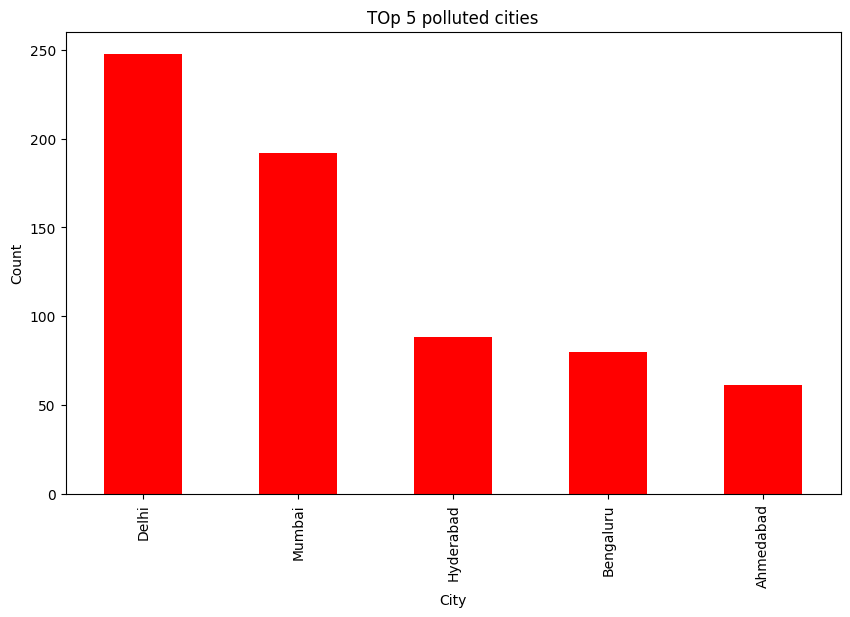

In [11]:
city_complaints_freq = data.groupby(['city'])['pollutant_avg'].size().sort_values(ascending=False)
city_complaints_freq = city_complaints_freq.head(5)
plt.figure(figsize=(10, 6))  # Set the figure size
city_complaints_freq.plot.bar(rot=90, fontsize=10, figsize=(10, 6), color='red',  title= "TOp 5 polluted cities")
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [12]:
city_list = []

for i in range(len(city_complaints_freq)):
    city = city_complaints_freq.index[i]
    freq = city_complaints_freq.iloc[i]
    city_list.append(city) 
city_list    

['Delhi', 'Mumbai', 'Hyderabad', 'Bengaluru', 'Ahmedabad']

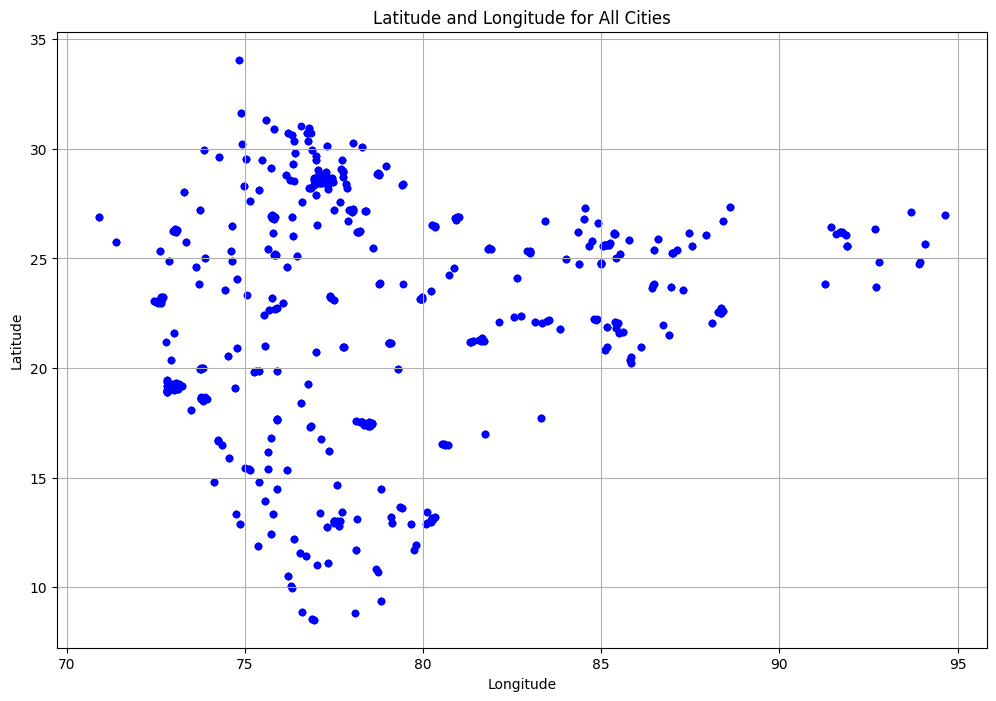

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5, s=20, c='blue')
plt.title('Latitude and Longitude for All Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

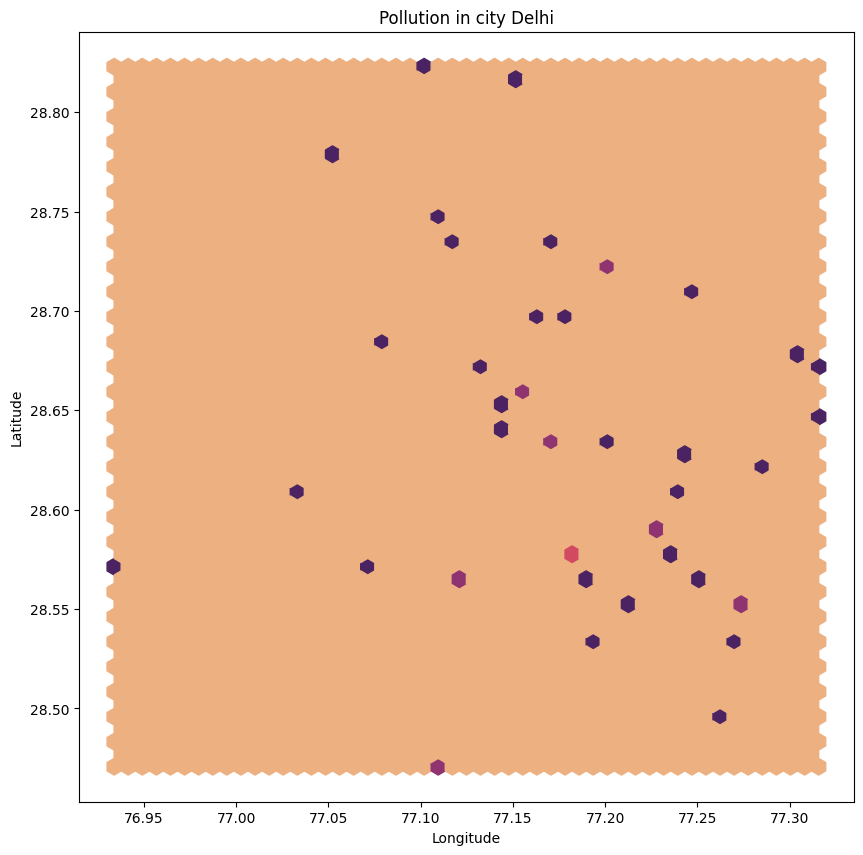

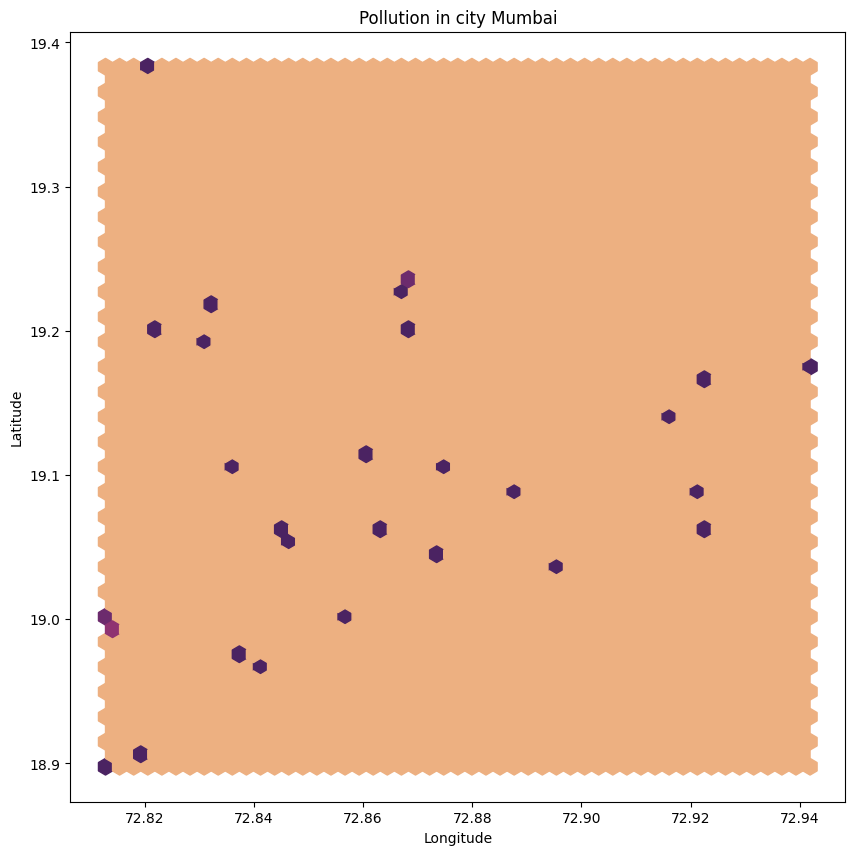

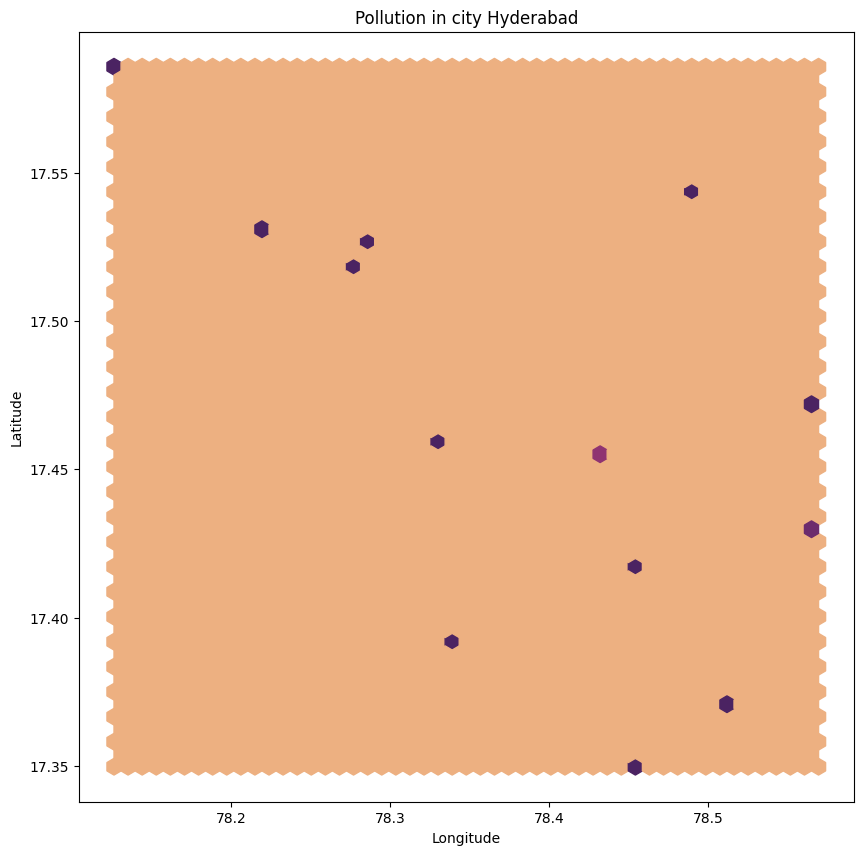

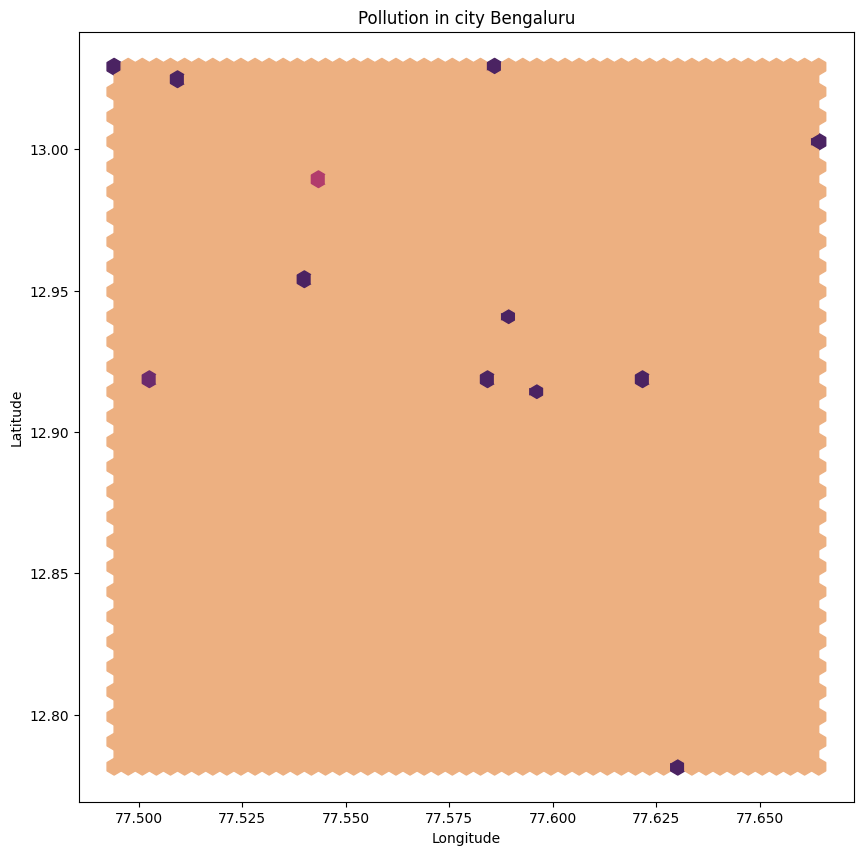

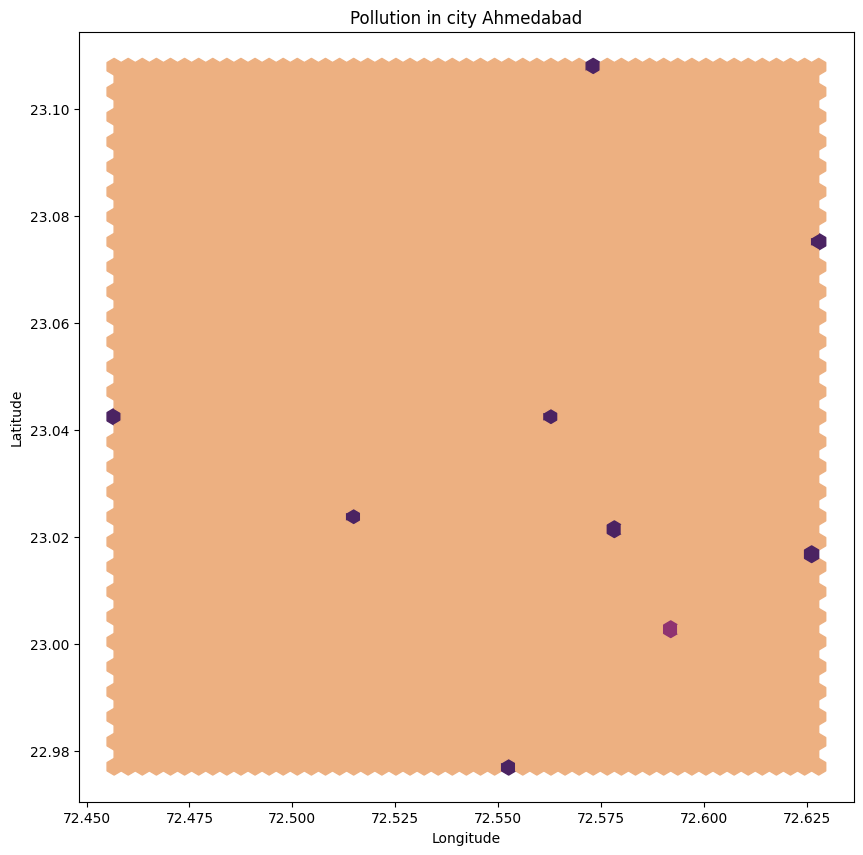

In [14]:
city_data = data[data['city'].isin(city_list)]
for city in city_list:
    city_subset = city_data[city_data['city'] == city]

    
    plt.figure(figsize=(10, 10))
    plt.hexbin(x=city_subset['longitude'], y=city_subset['latitude'], gridsize=50, cmap='flare')

    
    plt.title('Pollution in city ' + city)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    plt.show()


#Let us get the region with top 5 max polutted region

In [15]:
from scipy.stats import skew, kurtosis
from scipy.stats import probplot

skew_pol_min = skew(numerical_data['pollutant_min'])
k_pol_min = kurtosis(numerical_data['pollutant_min'])
print("Skweness and kurtosis of pollutant_min",skew_pol_min, k_pol_min)

skew_pol_max = skew(numerical_data['pollutant_max'])
k_pol_max = kurtosis(numerical_data['pollutant_max'])
print("Skweness and kurtosis of pollutant_max",skew_pol_max, k_pol_max)

k_pol_avg = kurtosis(numerical_data['pollutant_avg'])
skew_pol_avg = skew(numerical_data['pollutant_avg'])
print("Skweness and kurtosis of pollutant_avg",skew_pol_avg, k_pol_avg)

Skweness and kurtosis of pollutant_min 2.662813915378367 8.572297831726019
Skweness and kurtosis of pollutant_max 1.441769483405288 1.1512194437491567
Skweness and kurtosis of pollutant_avg 1.817159047846661 2.9635585970037086


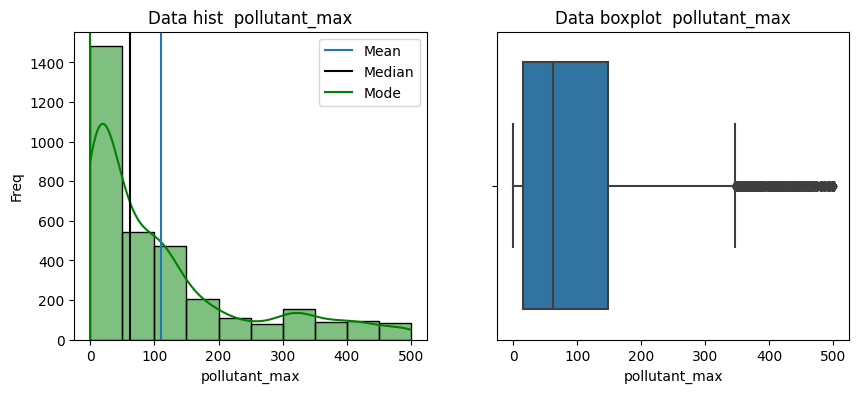

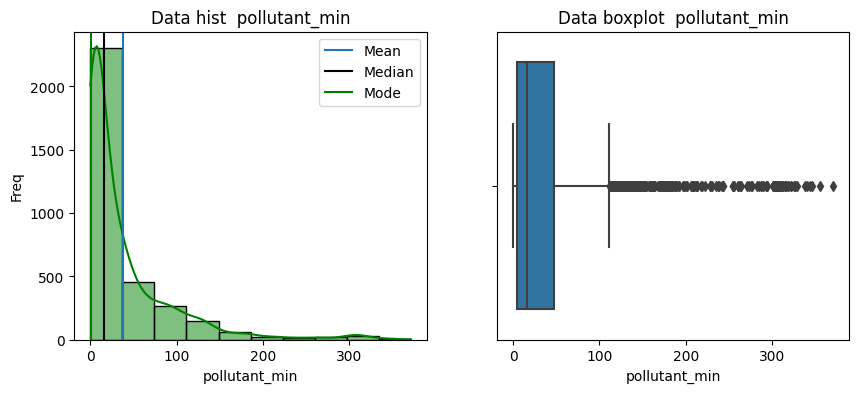

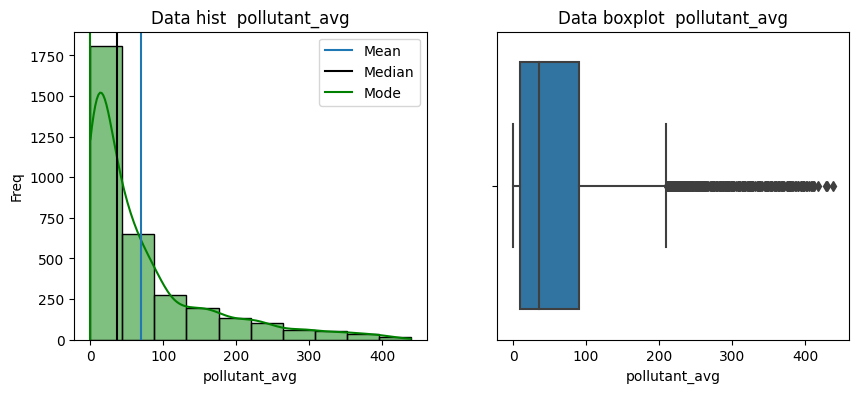

In [17]:
data_kurt = numerical_data[["pollutant_max","pollutant_min","pollutant_avg"]]

for i in data_kurt:
    
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data_kurt[i],kde=True,color='green', bins=10)  
    plt.title("Data hist  "+i)
    plt.ylabel("Freq")
    plt.xlabel(i)

    mean_price = data_kurt[i].mean()
    median_price = data_kurt[i].median()
    mode_price = data_kurt[i].mode().squeeze()

    plt.axvline(mean_price, label="Mean")
    plt.axvline(median_price, color="black", label="Median")
    plt.axvline(mode_price, color="green", label="Mode")
    plt.legend()
    
    
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_kurt[i])
    plt.title("Data boxplot  "+i)
    plt.show()


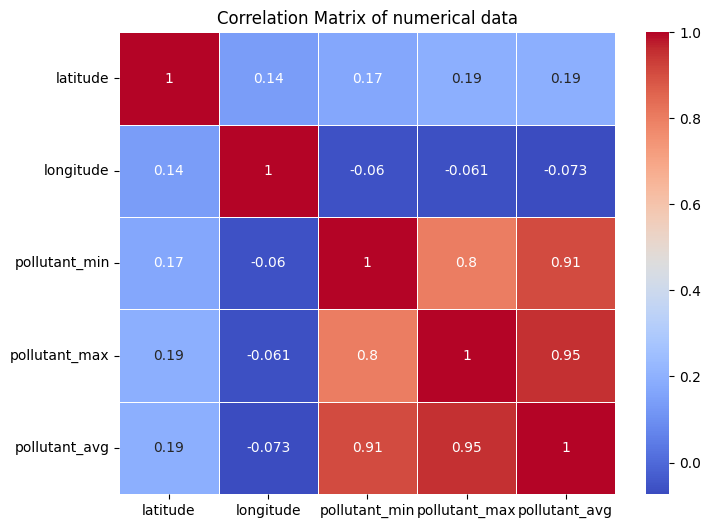

In [18]:
plt.figure(figsize=(8, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of numerical data')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_data.columns:
    if categorical_data[column].dtype == 'object':
        categorical_data[column] = label_encoder.fit_transform(categorical_data[column])

print("\nDataFrame after Label Encoding:")
print(categorical_data)


DataFrame after Label Encoding:
      state  city  station  station_code  pollutant_id
0         1     8      135             1             6
1         1    74      120             1             6
2         1   243      429             1             1
3         1   243      429             1             0
4         1   243      429             1             3
...     ...   ...      ...           ...           ...
3311     30   152      169            49             4
3312     30   152      330            49             1
3313     30   152      330            49             6
3314     30   152      330            49             3
3315     30   224      452            49             1

[3316 rows x 5 columns]


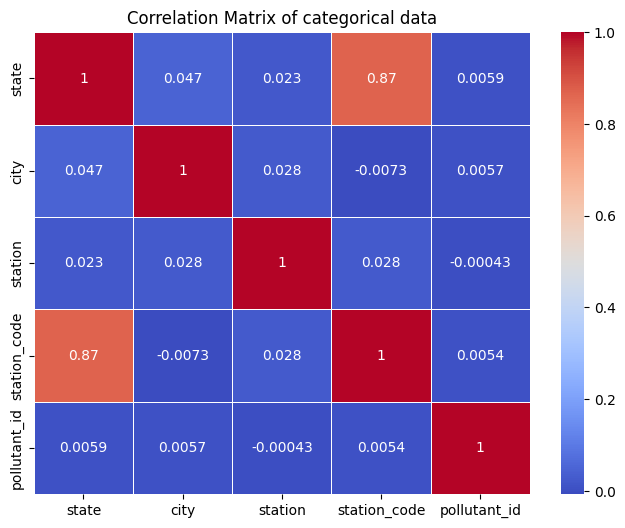

In [21]:
plt.figure(figsize=(8, 6))
correlation_matrix = categorical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of categorical data')
plt.show()

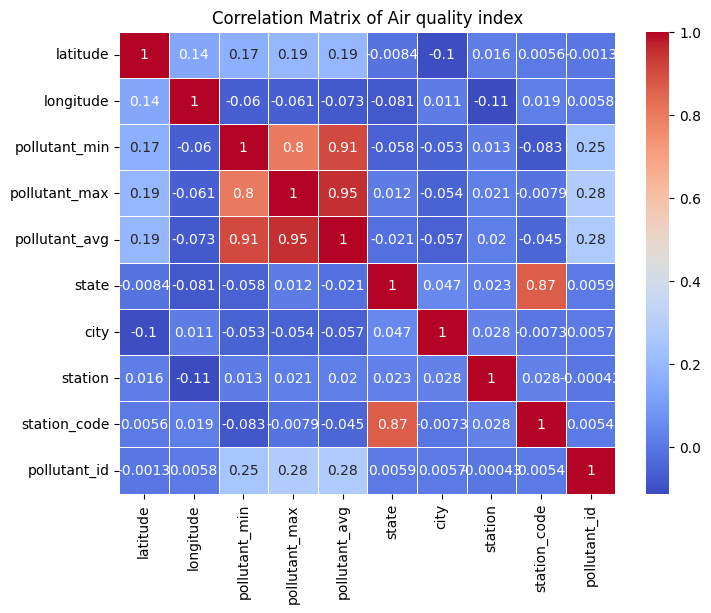

In [23]:
combined_data = pd.concat([numerical_data, categorical_data], axis=1)
plt.figure(figsize=(8, 6))
correlation_matrix = combined_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Air quality index')
plt.show()

In [25]:
data_new = combined_data.drop(columns=["longitude", "latitude","state"])
data_new

,pollutant_min,pollutant_max,pollutant_avg,city,station,station_code,pollutant_id
0,0,0,0,8,135,1,6
1,7,32,12,74,120,1,6
2,2,5,3,243,429,1,1
3,40,64,47,243,429,1,0
4,9,50,34,243,429,1,3
...,...,...,...,...,...,...,...
3311,80,202,125,152,169,49,4
3312,2,21,8,152,330,49,1
3313,7,63,23,152,330,49,6
3314,3,90,45,152,330,49,3


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results1 = calculate_vif(combined_data)
high_vif1 = vif_results1[vif_results1['VIF'] > 10]

vif_results2 = calculate_vif(data_new)
high_vif2 = vif_results2[vif_results2['VIF'] > 10]

print("Features with high VIF for the complete dataset",high_vif1 )
print("\n")
print("Features with high VIF for dataset with features removed after correlation matrix observation",high_vif2 )

Features with high VIF for the complete dataset         Variable        VIF
0       latitude  20.040377
1      longitude  30.451526
2  pollutant_min  10.285283
3  pollutant_max  23.471638
4  pollutant_avg  43.579300
5          state  19.175608
8   station_code  19.469632


Features with high VIF for dataset with features removed after correlation matrix observation         Variable        VIF
0  pollutant_min  10.270137
1  pollutant_max  23.440793
2  pollutant_avg  43.524734


In [28]:
y_original = data_new.pop('pollutant_avg')
x_original = data_new
print(y_original)
print("\n")
print(x_original)

0         0
1        12
2         3
3        47
4        34
       ... 
3311    125
3312      8
3313     23
3314     45
3315     14
Name: pollutant_avg, Length: 3316, dtype: int64


      pollutant_min  pollutant_max  city  station  station_code  pollutant_id
0                 0              0     8      135             1             6
1                 7             32    74      120             1             6
2                 2              5   243      429             1             1
3                40             64   243      429             1             0
4                 9             50   243      429             1             3
...             ...            ...   ...      ...           ...           ...
3311             80            202   152      169            49             4
3312              2             21   152      330            49             1
3313              7             63   152      330            49             6
3314              3             90   1

In [29]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(x_original, y_original, test_size=0.2, random_state=42)

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

k = 3
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_train_f, y_train_f)

selected_feature_names = X_train_f.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['pollutant_min', 'pollutant_max', 'pollutant_id'], dtype='object')


In [31]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfecv = RFECV(estimator=model, cv=5) 
rfecv.fit(X_train_f, y_train_f)

selected_feature_names = X_train_f.columns[rfecv.support_]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['pollutant_min', 'pollutant_max', 'station_code'], dtype='object')


In [32]:
x_original_new = data_new[["pollutant_min","pollutant_max","station_code","pollutant_id"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_original_new, y_original, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

               Model          MSE        MAE       R^2
0  Linear Regression   384.833667   9.577938  0.949427
1   Ridge Regression   384.833665   9.577938  0.949427
2   Lasso Regression   384.791652   9.566620  0.949432
3   Huber Regression   382.791106   9.439265  0.949695
4                SVR  1066.985224  13.616861  0.859781
5                KNN   368.867229   9.386747  0.951525
6      Random Forest   263.448664   7.979798  0.965379
7  Gradient Boosting   269.720859   8.486653  0.964554


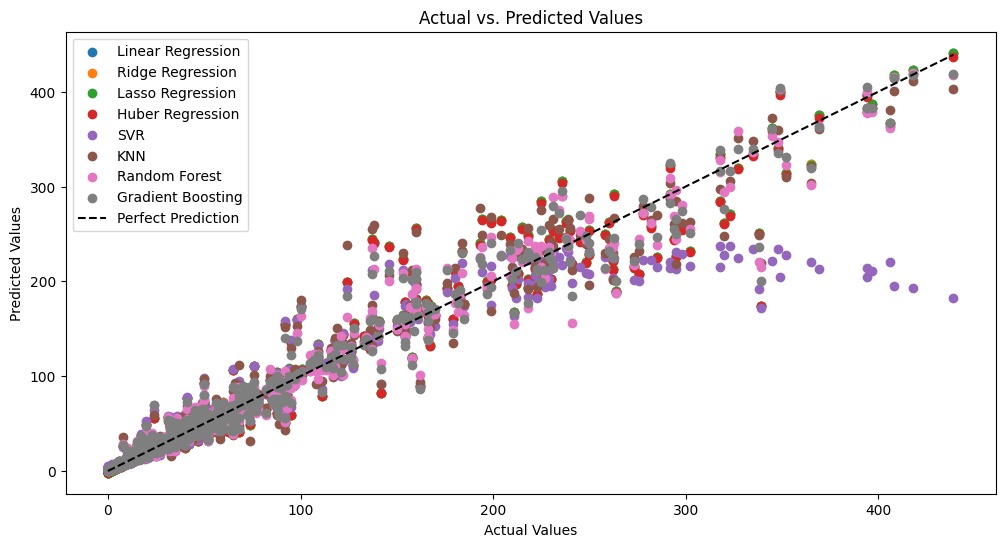

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Huber Regression': HuberRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {'Model': [], 'MSE': [], 'MAE': [], 'R^2': []}
predictions = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R^2'].append(r2)

    predictions[model_name] = y_pred
    
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(12, 6))

for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()